In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
df = pd.read_csv('datasets/iris.csv',
                      skiprows=1,
                      names = ['sepal-length',
                               'sepal-width',
                               'petal-length',
                               'petal-width',
                               'class'])

In [5]:
df.columns

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'], dtype='object')

In [6]:
df = df.sample(frac=1).reset_index(drop=True)

In [7]:
df.isna().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

In [8]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df['class'].unique()

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], dtype=object)

In [10]:
df['class'].value_counts()

class
Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: count, dtype: int64

In [11]:
label_encoding = LabelEncoder()

In [12]:
df['class'] = label_encoding.fit_transform(df['class'])

In [14]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,4.4,2.9,1.4,0.2,0
1,6.9,3.1,5.4,2.1,2
2,6.1,2.9,4.7,1.4,1
3,6.8,3.0,5.5,2.1,2
4,6.7,3.1,4.4,1.4,1


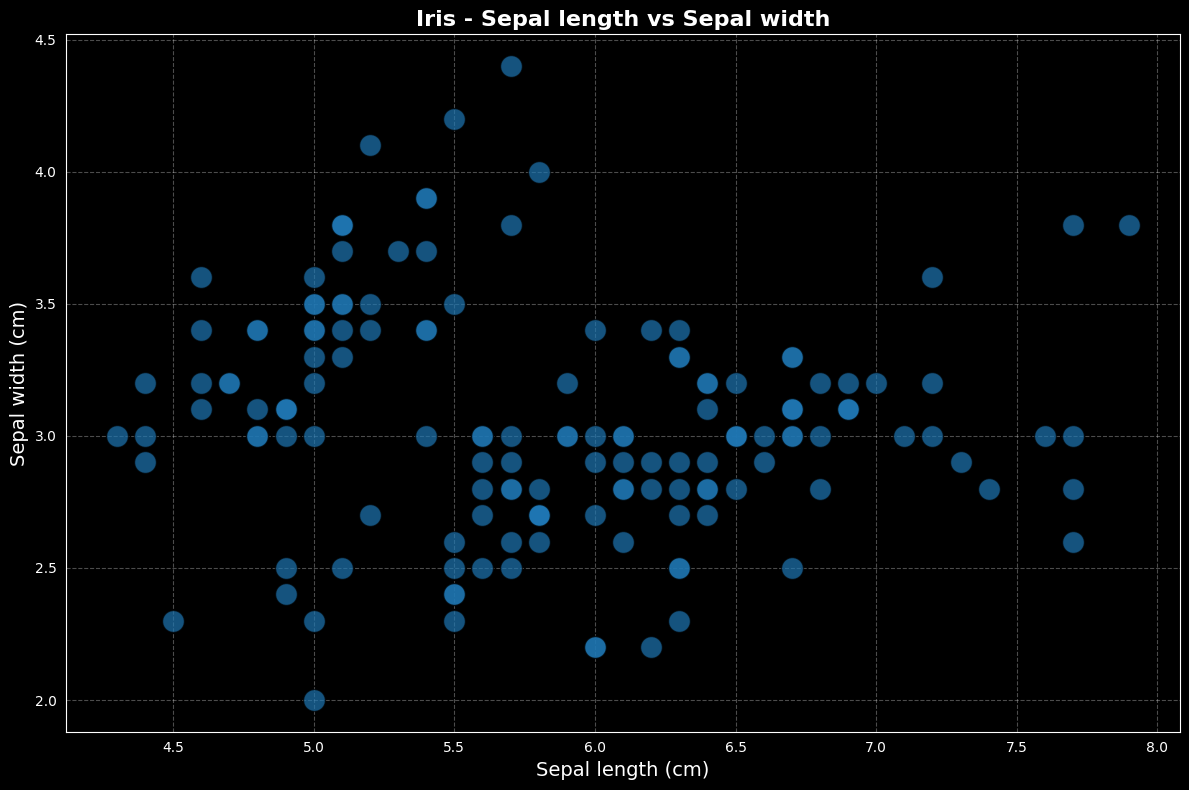

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(
    df['sepal-length'],
    df['sepal-width'],
    s=250,
    color='tab:blue',
    alpha=0.7,
    edgecolor='k'
)

ax.set_xlabel('Sepal length (cm)', fontsize=14)
ax.set_ylabel('Sepal width (cm)', fontsize=14)
ax.set_title('Iris - Sepal length vs Sepal width', fontsize=16, fontweight='bold')

ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()

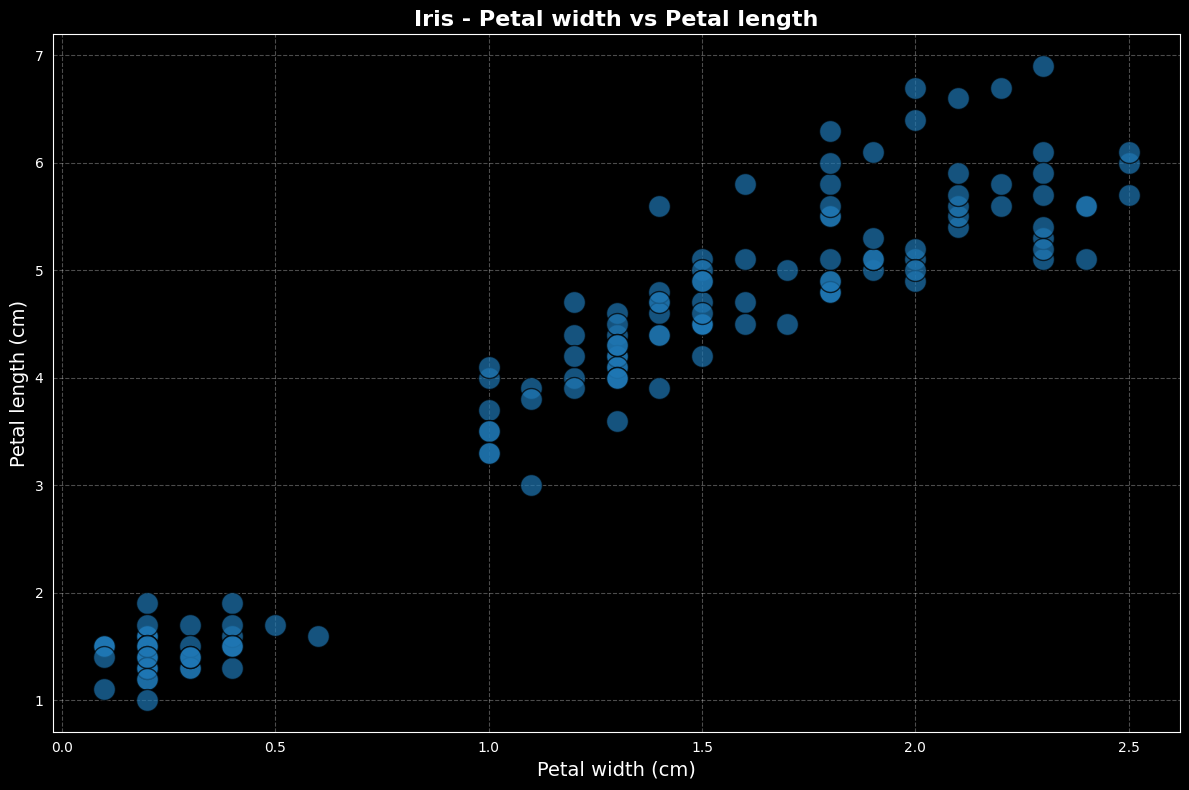

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(
    df['petal-width'],
    df['petal-length'],
    s=250,
    color='tab:blue',
    alpha=0.7,
    edgecolor='k'
)

ax.set_xlabel('Petal width (cm)', fontsize=14)
ax.set_ylabel('Petal length (cm)', fontsize=14)
ax.set_title('Iris - Petal width vs Petal length', fontsize=16, fontweight='bold')

ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()

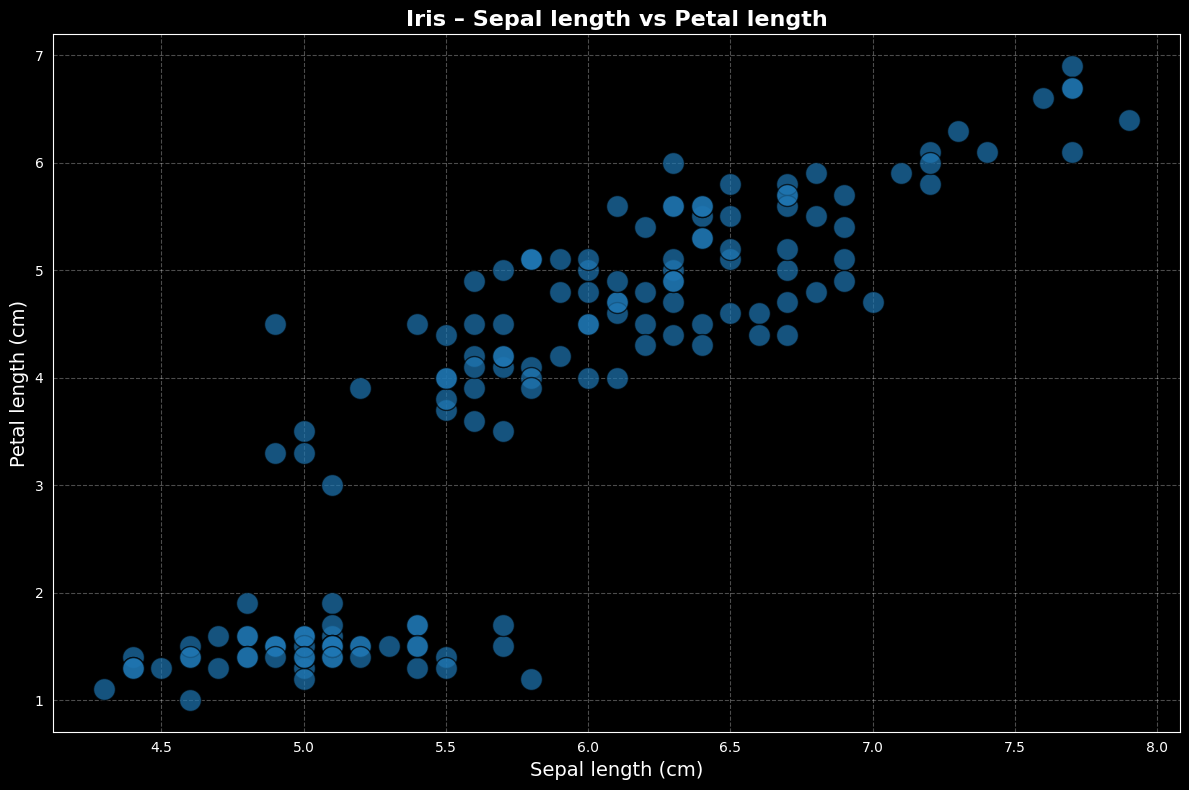

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(
    df["sepal-length"],
    df["petal-length"],
    s=250,
    color="tab:blue",
    alpha=0.7,
    edgecolor="k"
)


ax.set_xlabel("Sepal length (cm)", fontsize=14)
ax.set_ylabel("Petal length (cm)", fontsize=14)
ax.set_title("Iris – Sepal length vs Petal length", fontsize=16, fontweight="bold")


ax.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

In [19]:
iris_2d = df[['sepal-length', 'petal-length']]

In [20]:
iris_2d.sample(3)

,sepal-length,petal-length
70,6.7,5.6
68,5.8,5.1
88,5.4,1.5


In [21]:
model = KMeans(n_clusters=3, max_iter=10000).fit(iris_2d)

In [22]:
centroids = model.cluster_centers_

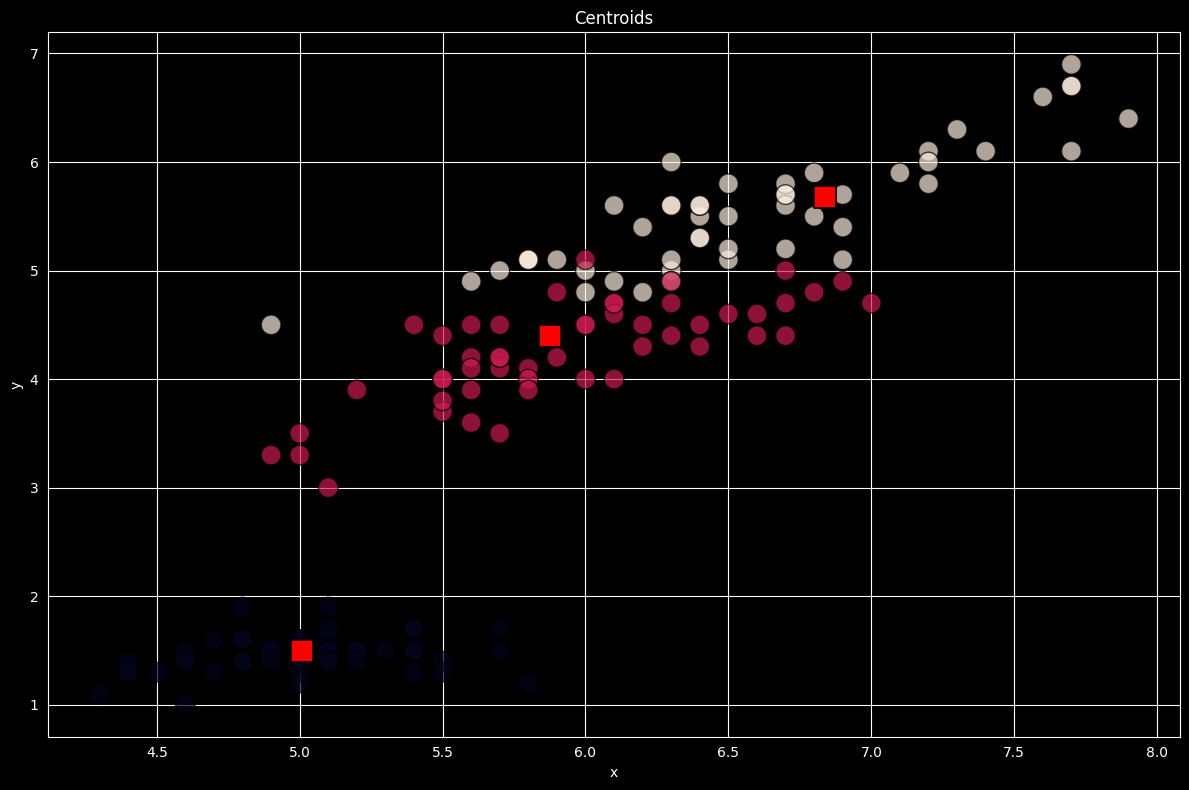

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['green', 'blue', 'purple']

ax.scatter(iris_2d['sepal-length'], iris_2d['petal-length'], s=200, alpha=0.7, edgecolors='k', c=df['class'])
ax.scatter(
    centroids[:, 0], centroids[:, 1],
    c='red', s=250, marker='s',
    edgecolor='black', linewidth=1.2,
    label='Centroids'
)

for i, (x, y) in enumerate(centroids):
    ax.annotate(
        str(i),
        (x + 15, y + 15),
        fontsize=14,
        fontweight='bold',
        color='darkred'
    )

ax.set_title('Centroids')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.tight_layout()
plt.show()



In [24]:
def evaluate_clustering(true_labels, predicted_labels, data):
    """
    Evaluate and display key clustering performance metrics.

    Parameters
    ----------
    true_labels : array-like
        Ground truth class labels (used for external evaluation).
    predicted_labels : array-like
        Cluster labels assigned by the clustering algorithm.
    data : array-like, shape (n_samples, n_features)
        Original feature matrix, required for silhouette score.

    Returns
    -------
    dict
        Dictionary containing all calculated metrics.
    """

    scores = {
        "Homogeneity_score": metrics.homogeneity_score(true_labels, predicted_labels),
        "Completeness_score": metrics.completeness_score(true_labels, predicted_labels),
        "V_measure_score": metrics.v_measure_score(true_labels, predicted_labels),
        "Adjusted_rand_score": metrics.adjusted_rand_score(true_labels, predicted_labels),
        "Adjusted_mutual_info_score": metrics.adjusted_mutual_info_score(true_labels, predicted_labels),
        "Silhouette_score": metrics.silhouette_score(data, predicted_labels),
    }
    print("\n=== Clustering Evaluation Metrics ===")
    for name, value in scores.items():
        print(f"{name:30s}: {value:.4f}")

    return scores

In [25]:
evaluate_clustering(df['class'], model.labels_, iris_2d)


=== Clustering Evaluation Metrics ===
Homogeneity_score             : 0.7033
Completeness_score            : 0.7097
V_measure_score               : 0.7065
Adjusted_rand_score           : 0.6989
Adjusted_mutual_info_score    : 0.7028
Silhouette_score              : 0.5891


{'Homogeneity_score': 0.7033177646052958,
 'Completeness_score': 0.7096993707802843,
 'V_measure_score': 0.706494157075837,
 'Adjusted_rand_score': 0.6988627672348092,
 'Adjusted_mutual_info_score': 0.7028024531409134,
 'Silhouette_score': 0.5890612473759281}